In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#comparing
from sklearn.model_selection import cross_val_score

In [2]:
data_train = pd.read_csv('datasets/sentiment140/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",header=-1)
data_test = pd.read_csv('datasets/sentiment140/testdata.manual.2009.06.14.csv',encoding="ISO-8859-1",header=-1)

In [3]:
data_train.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
np.unique(data_train[0])

array([0, 4])

In [5]:
data_test.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [6]:
y_train = data_train[0]
X_train = data_train.drop([0,1,2,3,4],axis=1)
y_test = data_test[0]
X_test = data_test.drop([0,1,2,3,4],axis=1)

In [7]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(1600000,)
(1600000, 1)
(498,)
(498, 1)


In [8]:
X_train[5]

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
5                              @Kwesidei not the whole crew 
6                                                Need a hug 
7          @LOLTrish hey  long time no see! Yes.. Rains a...
8                       @Tatiana_K nope they didn't have it 
9                                  @twittera que me muera ? 
10               spring break in plain city... it's snowing 
11                                I just re-pierced my ears 
12         @caregiving I couldn't bear to watch it.  And ...
13         @octolinz16 It it counts, idk why I did either...
14         @smarrison i would've been the first, but i di...
15         @iamjazzyfizzle I wish I got to watch it with ...
16         Hollis' death

In [9]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X_train = f.fit_transform(X_train[5])

In [10]:
print(X_train[1])

  (0, 106984)	1
  (0, 613955)	1
  (0, 537802)	1
  (0, 514128)	1
  (0, 599011)	1
  (0, 223278)	1
  (0, 634538)	1
  (0, 634826)	1


In [11]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1120000, 684047)
(1120000,)
(480000, 684047)
(480000,)


In [13]:
np.unique(y_train)

array([0, 4])

In [14]:
list_alpha = np.arange(1/100000, 20, 0.11)
print(len(list_alpha))
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_val, y_val)
    recall_test[count] = metrics.recall_score(y_val, bayes.predict(X_val),pos_label=4)
    precision_test[count] = metrics.precision_score(y_val, bayes.predict(X_val),pos_label=4)
    count = count + 1 

182


In [15]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.869499,0.746221,0.724051,0.758715
1,0.11001,0.860818,0.757212,0.731959,0.771943
2,0.22001,0.854477,0.761169,0.735085,0.776583
3,0.33001,0.849367,0.763379,0.736614,0.779310
4,0.44001,0.845114,0.765029,0.737686,0.781393
5,0.55001,0.841533,0.766138,0.738446,0.782770
6,0.66001,0.838245,0.766869,0.739070,0.783607
7,0.77001,0.835363,0.767552,0.739460,0.784505
8,0.88001,0.832763,0.767883,0.739627,0.784955
9,0.99001,0.830419,0.768344,0.740042,0.785469


In [16]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             4.180010
Train Accuracy    0.801881
Test Accuracy     0.769877
Test Recall       0.739361
Test Precision    0.788445
Name: 38, dtype: float64

In [17]:
bayes= naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)

MultinomialNB(alpha=4.180009999999999, class_prior=None, fit_prior=True)

In [18]:
m_confusion_test = metrics.confusion_matrix(y_val, bayes.predict(X_val))
# pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
#             index = ['Actual 0', 'Actual 1'])

In [19]:
m = bayes.predict(X_val)

In [20]:
np.unique(m)

array([0, 4])

In [21]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

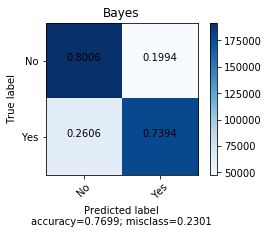

In [22]:
plot_confusion_matrix(cm           = m_confusion_test,
                      normalize    = True,
                      target_names = ['No', 'Yes'],
                      title        = "Bayes")

In [40]:
def inference(transformer, str):
    if(len(str)<1):
        return
    else:
        str = [str]
        str = transformer.transform(str)     
        return str

In [41]:
x = inference(loaded_vec,"shit product")

In [42]:
print(bayes.predict(x))

[0]


In [34]:
import pickle as pkl

In [36]:
pkl.dump(f.vocabulary_,open("vect.pkl","wb"))

In [39]:
loaded_vec = feature_extraction.text.CountVectorizer(decode_error="replace",vocabulary=pkl.load(open("vect.pkl", "rb")))

In [43]:
pkl.dump(bayes,open("naiveBayes.pkl","wb"))

In [45]:
loaded_model = pkl.load(open("naiveBayes.pkl", 'rb'))

In [47]:
print(loaded_model.predict(x))

[0]
